# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Compute the covariance matrix for X_train
    covariance_matrix = np.dot(X_train.T, X_train) / X_train.shape[0]
    
    # Step 2: Compute eigenvalues and eigenvectors for the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Step 3: Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    
    # Step 4: Select the top `n_components` eigenvectors (i.e., singular vectors)
    top_eigenvectors = eigenvectors[:, :n_components]
    
    # Step 5: Project the data onto the reduced dimension space
    X_train_reduced = np.dot(X_train, top_eigenvectors)
    X_test_reduced = np.dot(X_test, top_eigenvectors)
    
    return X_train_reduced, X_test_reduced, top_eigenvectors
    

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [9]:
svd_components = [50,150,300,450,784]  # You need to decide what number to search...

# Store the results
results = [] #Forgot to use this variable but already ran it so I manually put the data in their repsective arrays below

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, top_eigen_vectors = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    results.append((n_components, accuracy,training_time))
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 50 components...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 13.4262 seconds
Applying custom SVD with 150 components...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 150, Accuracy: 0.9198, Training time: 82.2351 seconds
Applying custom SVD with 300 components...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.9205, Training time: 224.1474 seconds
Applying custom SVD with 450 components...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 450, Accuracy: 0.9200, Training time: 455.7817 seconds
Applying custom SVD with 784 components...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 817.1328 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


[0.9085, 0.9197857142857143, 0.9205, 0.92, 0.9208571428571428]


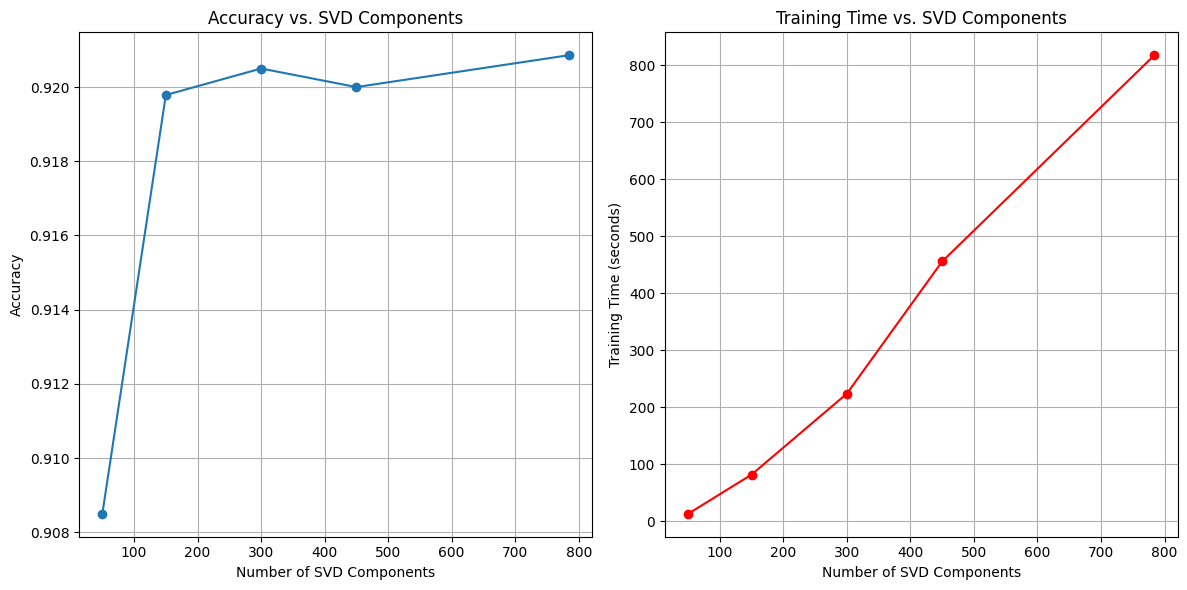

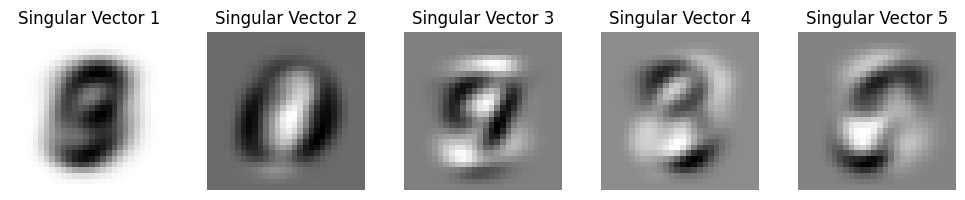

In [21]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
#n_components, accuracy,training_time
svd_components = [50,150,300,450,784]  # You need to decide what number to search...
accuracy = [j for i,j,k in results]
print(accuracy)
training_time = [k for i,j,k in results]

#Plot Accuracy vs. SVD componenets 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(svd_components, accuracy, marker='o')
plt.title('Accuracy vs. SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Training Time vs. SVD components
plt.subplot(1, 2, 2)  # Second subplot for training time
plt.plot(svd_components, training_time, marker='o', color='red')
plt.title('Training Time vs. SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize the Top 5 Singular Vectors
def plot_singular_vectors(singular_vectors):
    # Plot the first 5 singular vectors, reshaped into 28x28 images (assuming MNIST)
    plt.figure(figsize=(10, 2))
    for i in range(5):
        vector_image = singular_vectors[:, i].reshape(28, 28)  # Reshape to 28x28
        plt.subplot(1, 5, i+1)
        plt.imshow(vector_image, cmap='gray')
        plt.title(f'Singular Vector {i+1}')
        plt.axis('off')  # Turn off axis

    plt.tight_layout()
    plt.show()

plot_singular_vectors(top_eigen_vectors)








## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

In [ ]:

"""
Looking at the graph of the number of SVD components versus accuracy, it appears that using 784 SVD components yields the highest accuracy at 0.920857%.
However, this also results in the longest training time, taking over 800 seconds, or nearly 13 minutes.
That being said, when considering both training time and accuracy, there’s an important observation: after 300 components, the accuracy does not significantly improve, despite the substantial increase in training time for models using more than 300 components.
Therefore, taking into account both speed and accuracy, I would conclude that 300 components are the optimal choice. 
While 784 components technically provide slightly higher accuracy, the increase in training time isn't justified by such a small gain. Overall, 300 components strike the best balance between accuracy and efficiency.

"""
